
# Session 4:
## Matching and causal trees

*Andreas Bjerre-Nielsen*

## Agenda

1. [Causality](#Causality)
1. [Potential outcomes](#Potential-outcomes)
2. [Experiments](#Experiments)
3. [Matching](#Matching)
    - [Covariate based matching](#Covariate-matching)
    - [Propensity score matching](#Propensity-score-matching)
    
4. [Heterogeneous treatment effects with causal trees](#Causal-trees)

# Buckle up... 

In [170]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Causality



## Correlation does not imply causation

Spurious or causal?

<br>
<br>

<center><img src='http://www.overthinkingit.com/wp-content/uploads/2008/09/rs-500-us-oil-production1.jpg' alt="Drawing" style="width: 1000px;"/></center>


Figure below is adapted from chapter 5 in Judea Pearl's book titled "Book of Why"

C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


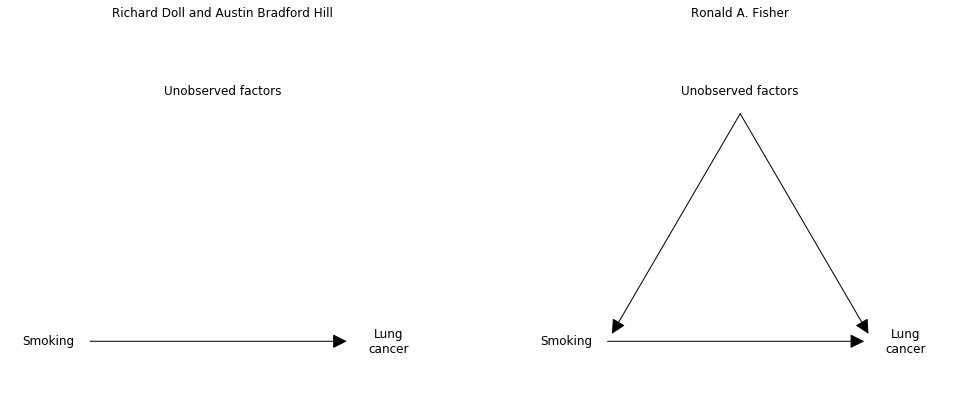

In [171]:
import networkx as nx


f_lung_cancer, ax = plt.subplots(1,2,figsize=(17,6.7))
ax[0].set_title('Richard Doll and Austin Bradford Hill')
ax[1].set_title('Ronald A. Fisher')

s,l,g= 'Smoking', 'Lung\ncancer', 'Unobserved factors'
for i in range(2):
    G = nx.DiGraph()
    G.graph['dpi'] = 120
    G.add_nodes_from([s,l,g])
    G.add_edges_from([(s,l)])
    
    if i>0:
        G.add_edges_from([(g,l),(g,s)])
    
    nx.draw_networkx_nodes(G,node_color='white',node_size=1000,alpha=0,ax=ax[i],
                           pos = {g: [1,1], s: [0,0], l: [2,0]})
    nx.draw_networkx_edges(G,arrowsize=30,ax=ax[i],
                           pos = {g: [1,1], s: [0.2,0], l: [1.8,0]})
    nx.draw_networkx_labels(G,ax=ax[i],                            
                            pos = {g: [1,1.1], s: [-.05,0], l: [2,0]})
    ax[i].axis('off')
    ax[i].set_xlim([-.3,2.3])
    ax[i].set_ylim([-.2,1.4])
    

## What is causality?

Relationship between two or more variables such that whereby a change in one or more variable(s) ***affect(s)*** the distribution of one or more other variable(s).

We can draw these relationships

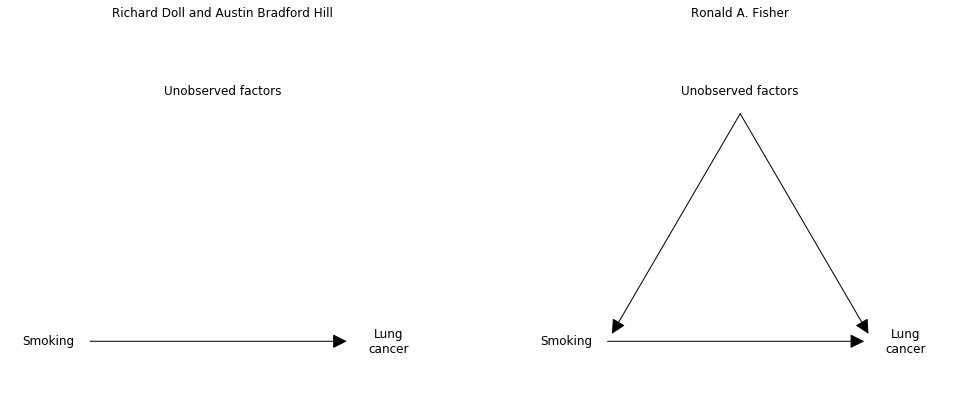

In [172]:
f_lung_cancer

## Establishing causality

Currently there are two broad branches for establishing causal relationships:

- Experiment and quasi-experiments
    - Corresponds to what is taught in *Mostly Harmless Econometrics*
- Structural equation models 
    - Used for structural econometric choice models etc.
    - Also used estimating causal graphs, e.g. as by Judea Pearl
    

# Potential outcomes

## The Rubin Causal Model

We are interested in the effect of some treatment, e.g. 
- getting admitted to a certain educaton on wages, life-expectancy 
- access to paternity leave on wages (husband and wife)




Denote the treatment variable as $D_i$ where $D_i=1$ corresponds to unit $i$ being treated, while $D_i=0$ is not treated. Define the potential outcomes:

$Y_i=\begin{cases}
Y_i(1), & D_i=1;\\
Y_i(0), & D_i=0.
\end{cases}$


The observed outcome $Y_i$ can be written in terms of potential outcomes as
$$ Y_i = Y_{i}(0) + [Y_{i}(1)-Y_{i}(0)]D_i$$

$Y_{i}(1)-Y_{i}(0)$ is the *causal* effect of $D_i$ on $Y_i$. 

But we never observe the same individual $i$ in both states. This is the **fundamental problem of causal inference**. 

## Selection Bias

We need some way of estimating the state we do not observe (the ***counterfactual***)

Usually, our sample contains individuals from both states - treated and untreated.

So why not do a naive comparison of averages by treatment status? i.e. $E[Y_i|D_i = 1] - E[Y_i|D_i = 0]$

## Selection Bias II
We can rewrite into:
\begin{align}
\nonumber E[Y_i|w_i = 1] - E[Y_i|w_i = 0] = &E[Y_i(1)|w_i = 1] - E[Y_i(0)|w_i = 1] + \\
 \nonumber  &E[Y_i(0)|w_i = 1] - E[Y_i(0)|w_i = 0] 
\end{align}


The decomposition:

 - $E[Y_i(1)|w_i = 1] - E[Y_i(0)|w_i = 1] = E[Y_i(1) - Y_i(0)|w_i = 1]$: the average *causal* effect of $w_i$ on $Y$. 

- $E[Y_i(0)|w_i = 1] - E[Y_i(0)|w_i = 0]$: difference in average $Y_i(0)$ between the two groups. Likely to be different from 0 when individuals are allowed to self-select into treatment. Often referred to as ***selection bias***. 

# Experiments

## Random assignment solves the problem

Random assignment of $D_i$ solves the problem because random assignment makes $D_i$ independent of potential outcomes

That means that $E[Y_{i}(0)|D_i = 1] = E[Y_{i}(0)|D_i = 0]$ and thus that the selection bias term is zero

Intuition: with random assignment, non-treated individuals can be used as counterfactuals for treated (*what would have happened to individual $i$ had he not received the treatment*?)

This allows us to overcome the fundamental problem of causal inference


## Randomization

Holland and Rubin (1986)

> no causation without manipulation


As mentioned, we need to worry when individuals are allowed to self-select

This means that a lot of thought has to go into the *randomization phase*

Randomization into treatment groups has to be manipulated by someone 

But what about effect of *immutable characteristics* such as race, gender, etc.?



## Randomized Controlled Trials

*Randomized controlled trials (RCT)*: randomization done by researcher

- Survey experiments
- Field experiments

Note: difficult to say one is strictly better than the other. Randomization can be impractical and/or unethical. 


## Case: Racial Discrimination in the Labor Market

Does racial discrimination exist in the labor market?

*Experiment*: In response to newspaper ads, researchers send out resumes of fictitious job candidates, varying only the names of the job applicants while leaving all other information in the resumes unchanges

Names were randomized between stereotypically black- and white-sounding names (Lakisha, Jamal, Emily, Greg, etc.)

## Case: Racial Discrimination in the Labor Market (2)

In [173]:
from scipy.stats import ttest_ind
url = "https://raw.githubusercontent.com/kosukeimai/qss/master/CAUSALITY/resume.csv"
df = pd.read_csv(url)
print(df.head(3))
ttest_ind(*[sub.call for _,sub in df.groupby('race')])

  firstname     sex   race  call
0   Allison  female  white     0
1   Kristen  female  white     0
2   Lakisha  female  black     0


Ttest_indResult(statistic=-4.114705266723095, pvalue=3.9408025140695284e-05)

## Case: Racial Discrimination in the Labor Market (3)

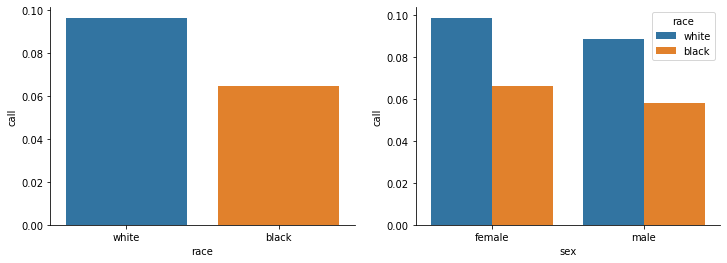

In [174]:
f_discriminate, ax = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='race', y='call', data=df, ax=ax[0],ci=None)
sns.barplot(x='sex', hue='race', y='call', data=df, ax=ax[1],ci=None)
sns.despine(ax=ax[0]) 
sns.despine(ax=ax[1])

## External & internal validity

*Internal validity*: Refers to the validity of causal conclusions

*External validity*: Refers to the extent to which the conclusions of a particular study can be generalized beyond a particular setting

RCTs - external and internal validity. Kosuke Imai argues in his book that there is tradeoff - the context of experiments is too narrow and must be complemented by observational studies leveraging causal methods.


## An alternative to experiments

*Quasi-experiments*: randomization happens by "accident"

- Matching (on observables) > (today)
- Differences in Differences
- Regression Discontinuity Design
- Instrument variables


# Matching


## The what and why of matching

**What** - we construct counterfactual potential treated and control units. 
- We *match* observations across treatment and control based on similarity. 

**Why** -  matching control for used covariates 
- excludes (observable) confounders 
- may improve precision of treatment estimate of experiments (less variance)

Note: An alternative to matching is to using regression - basically same idea.

Problem: 
- matching does not unconfound generally!!
- unobserved factors may still confound 

## The how of matching

We use a set of covariates $X$ for matching.

Two core ideas:
- We match on covariates 
    - We require sufficient similarity by some metric over covarities
- We match on propensity    
    - We require sufficient similar probability of treatment (prediction)


# Covariate based matching



## Exact matching


 We match a treatment $i$ obs. with control obs. $j$ if 
 - $X_i=X_j$, i.e. they are exactly identical, 
 - $||X_i-X_j||_2=0$, i.e. zero Euclidian distance
 

## Treatment effects


We can compute the Average Treatment Effect (ATE) 

- For treatment obs. $i$ the counterfactual outcomes $Y_i(0)$ are the average of control $j$ where $X_j=X_i$.
- For control obs. $i$ the counterfactual outcomes $Y_i(1)$ are the average of treatment $j$ where $X_j=X_i$.

We can also compute treatment effects only for treament observations, known as Average Treatment Effect on the Treated (**ATT** or **ATET**).

## Balance of match

What happens if some observations are not matched?
- We get biased estimates!
- We not to check whether the match is balanced
    - Problem, exact matching usually leads to very few matches.

## Example of exact matching 


Aim: understand whether traning program affects wages. 

We have covariates and outcomes treatment and controls. (synthetic data from Scott Cunninghams's "Causal Inference - The Mixtape" book)

In [175]:
scuse = 'https://storage.googleapis.com/causal-inference-mixtape.appspot.com/{0}.dta'
df = pd.read_stata(scuse.format('training_example')).replace('',np.nan)
arr = df.values[:20].astype('float')
X_cntrl, y_cntrl = arr[:20,4:5], arr[:20,5]
X_treat, y_treat = arr[:10,1:2], arr[:10,2]

df.iloc[:2,[1,2,4,5]]

,age_treat,earnings_treat,age_control,earnings_control
0,18.0,9500,20.0,8500.0
1,29.0,12250,27.0,10075.0


## Example of exact matching (2)

We have only one dimension of covariate so we can easily check the balance.
- Problem no counterfactuals for control!!

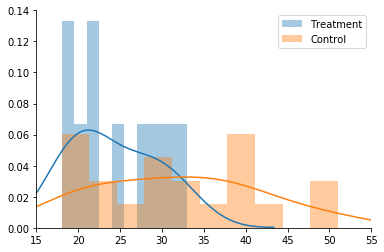

In [176]:
f,ax = plt.subplots()
sns.distplot(X_treat, bins=10, label='Treatment', ax=ax)
sns.distplot(X_cntrl, bins=10, label='Control', ax=ax)
ax.legend()
ax.set_xlim(15,55)
sns.despine(f)

## Example of exact matching (3)

We can match exactly using `RadiusNeighborsRegressor` with zero radius.
- OBS: in econometrics this radius is often known as a caliper 

In [177]:
from sklearn.neighbors import RadiusNeighborsRegressor as RNR

impute_t_exact = RNR(radius=0).fit(X_cntrl, y_cntrl).predict(X_treat)
impute_c_exact = RNR(radius=0).fit(X_treat, y_treat).predict(X_cntrl)
impute_t_exact

C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\regression.py:327: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


array([ 8050., 10525.,  9400., 10075., 11425.,  8950.,  8275.,  8500.,
        8725.,  9875.])

## Exact matching (4)

We can compute unbiased estimate of ATT:

In [178]:
diff = y_treat - impute_t_exact
print(f'ATT: {round(diff.mean(),1)} ± {round(diff.std()*1.96,1)}')

ATT: 1695.0 ± 646.7


## Other covariate based matching

We can extend exact matching in several ways

- Coarsened Exact Matching: 
    - where continuous variables are split into blocks
    - very popular for experiments
- Radius / Caliper matching
- Nearest neighbor matching

We can also have different metrics:
- Euclidian
- Mahalanobis distance ($=(X-\bar{X})^TCOVAR(X)(X-\bar{X}) $)

Note that approximate matching on covariates may introduce other biases, see [Abadie and Imbenes (2011)](https://doi.org/10.1198/jbes.2009.07333).


# Propensity score matching


## Predicting treatment status

Alternative way of match on likelihood of treatment.

Procedure: 
1. estimate a model that predicts treatment 
2. match with observations of similar treatment likelihood
    - (use match function, e.g. nearest neighbor, caliper)
3. compute counterfactual outcomes for treatment and control
4. (possibly adjust for differences in observed covariates)
5. compute ATE

## Uncoundedness property

[Rosenbaum and Rubin (1983)](https://doi.org/10.1093/biomet/70.1.41) show that propensity score matching will unconfounded:
- can serve as an unbiased estimator of the average treatment effect
- endows non-experimental data with experimantal qualities

Critical conditional independence assumption (**CIA**): 
- requires no unobserved confounders 
- often CIA is violated 
  - e.g. causal effect of taking education with registry data - many unobserved factors
  

## Summary - matching

Useful tool, but requires that we know all relevant factors 
- can be useful to minimize variance of experimental estimates
- problem in observational studies - often there are unobserved confounders and selection



# Causal trees


## Average Joe
Suppose, we have credible measures of average treatment effect, $\tau$. 

Can we get personalized estimates? 

- Measure whether immigrants are worse off under our new school policy
- Some react positively to one kind of information, others to another


## Beyond average Joe

Goal: compute Conditional Average Treatment Effects (CATE)

- treatment effect given characteristics
- $\tau(x) = \mathbb{E}[Y_i(1)-Y_i(0)|X=x]$

Existing methods - use regression analysis! 

But.. **True model is unknown**..!

- May need to test model on data.
- Can lead to conclusions based on data mining (dangerous!!)

## Being dishonest with you

An adaptive, data driven approach

- use all data for training decision tree
    - partitions X into categories based outcome similarity
    - enough treatment and control in each leaf
- then estimating treatment effects in partitions
    - measure treatment effects in each partition group (=leaf in tree model)

**Quiz**: is this different from propensity scores?

- Propensity scores has treatment assignment $D_i$ as target.

- The adaptive approach uses outcome $y_i$ as target.

## Getting honest with you

Could we use our model testing ideas? 

[Athey and Imbens (2016)](https://doi.org/10.1073/pnas.1510489113) suggest to let data speak **honestly**: 
- half of sample ($\mathcal{S}^{tr}$) for training decision tree
    - partitions X into categories based outcome similarity
    - enough treatment and control in each leaf
- other half ($\mathcal{S}^{est}$) for estimating treatment effects 
    - measure treatment effects in each partition group (=leaf in tree model)


This is similar to splitting into train and test
- prevents data-leakage
- allows honest evaluation of model performance! 


## Core assumption

Potential outcomes and treatment assignment are unconfounded given covariates 

\begin{equation*}
D_i \,\perp\!\!\perp\, (Y_i(1), \,Y_i(0))\,\, | \,\, X
\end{equation*}

- where $\perp\!\!\perp$ is a symbol  for conditional independence (strong assumption!!)
- recall from earlier
    - always holds for experiments
    - or propensity scores (note: assumption cannot be tested)

## Modified splitting procedure

The usual way of training decision trees is Classification And Regression Trees (CART).

- Splits leaves repeatedly based on criteria (e.g. entropy, MSE)
- We can put in restriction, e.g. depth of trees (hyperparameters)

Causal trees 
- new criteria: 
    - expected MSE (in hypothetical test set): $\mathbb{E}[\underset{=MSE}{\underbrace{(Y_i-\bar{Y}_i)^2}} - Y_i^2]$
    - idea: new term $Y_i^2$ penalizes small leaves 
- note: same ranking as MSE, matters for properties

## Modified splitting procedure

The usual way of training decision trees is Classification And Regression Trees (CART).

- Splits leaves repeatedly based on criteria (e.g. entropy, MSE)
- We can put in restriction, e.g. depth of trees (hyperparameters)

Causal trees 
- criteria: $\mathbb{E}[(Y_i-\bar{Y_i})^2 - Y_i^2]$
- note: same ranking as MSE, matters for properties

## Inference

Partioning of the covariate data works like coarsened matching!

- Estimate average treatment effects locally for each group/leaf
- Corresponds to local matching!

## Inference - validation

[Athey and Imbens (2016)](https://doi.org/10.1073/pnas.1510489113) performs a simulation study under various scenarios. 

Main take-away: **honest** outperforms **adapative** (convential CART).

<br>

<center><img src='https://raw.githubusercontent.com/abjer/sds_eml_2020/master/material/session_4/athey_imbens_ct.png' alt="Drawing" style="width: 400px;"/></center>




## Summary - causal trees

Leverage machine learning idea: 
- Heterogeneity is estimated separate from treatment effects.
- New scoring function makes smaller leafs.
- Outperforms adapative procedure

Main advantage 
- Structure of heterogeneity from data.
- Can be part of pre-analysis plan - only one solution (given split of data!).

